## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: ENGG69 - Deep Learning

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

### FRUIT CLASSIFIER


In [1]:
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks


### Loading Data

In [2]:
# load dataset

#24 classes
##train_dir = 'C:/Users/Jrmar/Documents/VS CODE/fruits-360-original-size/Training'
#test_dir = 'C:/Users/Jrmar/Documents/VS CODE/fruits-360-original-size/Test'

#141 classes
train_dir = 'C:/Users/Jrmar/Documents/VS CODE/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = 'C:/Users/Jrmar\Documents/VS CODE/fruits-360_dataset_100x100/fruits-360/Test'




# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)

Found 70491 files belonging to 141 classes.
Using 56393 files for training.
Found 70491 files belonging to 141 classes.
Using 14098 files for validation.


### Name of Classes

In [3]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple hit 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1', 'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink 1', 'Grapefruit White

### Showing Images

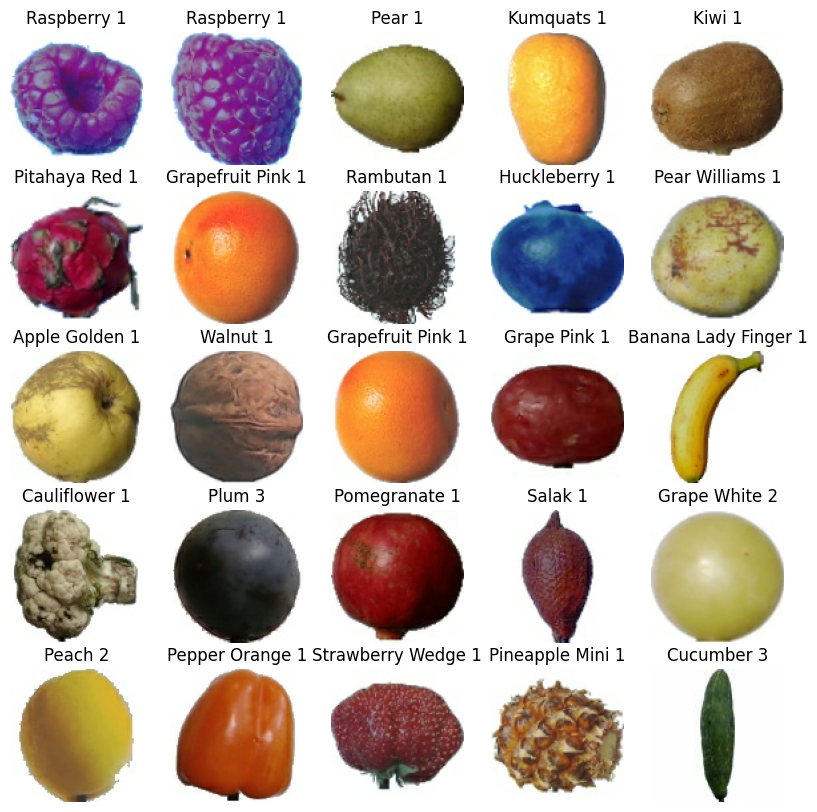

In [4]:
# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()

### Data Augmentation


In [5]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),            # Flip horizontal aleatório
    tf.keras.layers.RandomRotation(0.2),                # Rotação aleatória de 20%
    tf.keras.layers.RandomZoom(0.1),                    # Zoom aleatório de até 10%
    tf.keras.layers.RandomContrast(0.2)                 # Contraste aleatório de até 20%
])

### Building Model

In [6]:
# Definição do modelo (com camadas convolucionais personalizadas)
from tensorflow.keras import Sequential
model = Sequential()

# Camadas convolucionais
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(100, 100, 3)))  # Camada Conv2D de 32 filtros
model.add(layers.Activation('relu'))  # Ativação ReLU
model.add(layers.Conv2D(32, (3, 3)))  # Camada Conv2D de 32 filtros
model.add(layers.Activation('relu'))  # Ativação ReLU
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Camada de MaxPooling
model.add(layers.Dropout(0.25))  # Camada de Dropout

# Camadas adicionais convolucionais
model.add(layers.Conv2D(64, (3, 3), padding='same'))  # Camada Conv2D de 64 filtros
model.add(layers.Activation('relu'))  # Ativação ReLU
model.add(layers.Conv2D(64, (3, 3)))  # Camada Conv2D de 64 filtros
model.add(layers.Activation('relu'))  # Ativação ReLU
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Camada de MaxPooling
model.add(layers.Dropout(0.25))  # Camada de Dropout

# Camada de Flatten
model.add(layers.Flatten())  # Flatten a saída da última camada convolucional

# Camada densa
model.add(layers.Dense(512))  # Camada Dense com 512 neurônios
model.add(layers.Activation('relu'))  # Ativação ReLU
model.add(layers.Dropout(0.5))  # Camada de Dropout

# Camada de saída
model.add(layers.Dense(num_classes))  # Camada Dense com número de classes como número de saídas
model.add(layers.Activation('softmax'))  # Ativação Softmax para a classificação multiclasse

# Definir o otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilar o modelo
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Exibir o resumo do modelo
#print(model.summary())


c:\Users\Jrmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Model

In [17]:
# Definir o otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilar o modelo
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Definir callback EarlyStopping
early_stopping = callbacks.EarlyStopping(patience=3)

# Treinar o modelo com EarlyStopping
history = model.fit(
    train_ds,
    epochs=4,
    validation_data=val_ds,
    callbacks=[early_stopping]  # Adicionar o EarlyStopping ao processo de treinamento
)

Epoch 1/4


c:\Users\Jrmar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1763/1763 ━━━━━━━━━━━━━━━━━━━━ 5746s 3s/step - accuracy: 0.5648 - loss: 1.8050 - val_accuracy: 0.9959 - val_loss: 0.0265
Epoch 2/4
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 840s 476ms/step - accuracy: 0.9420 - loss: 0.1951 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 3/4
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 883s 501ms/step - accuracy: 0.9685 - loss: 0.0990 - val_accuracy: 0.9991 - val_loss: 0.0030
Epoch 4/4
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 860s 488ms/step - accuracy: 0.9823 - loss: 0.0587 - val_accuracy: 0.9999 - val_loss: 6.5432e-04


### Accuracy and Loss Plot

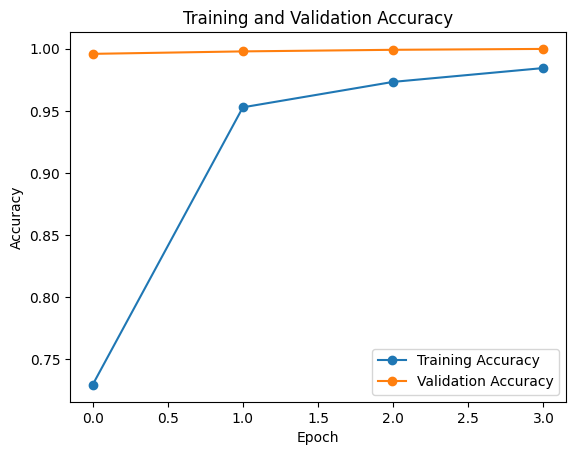

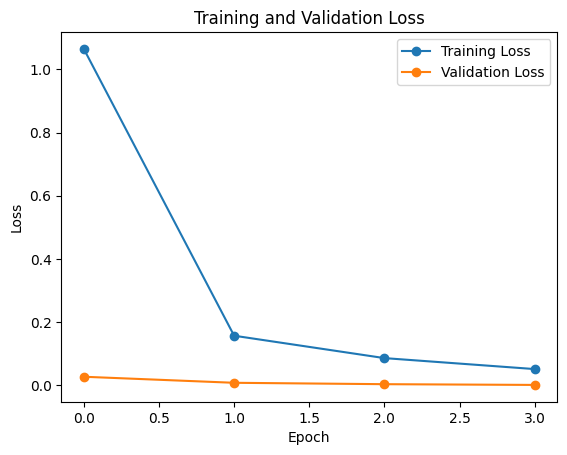

In [18]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### MATRIZ CONFUSÃO E CLASSIFICATION REPORT

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━

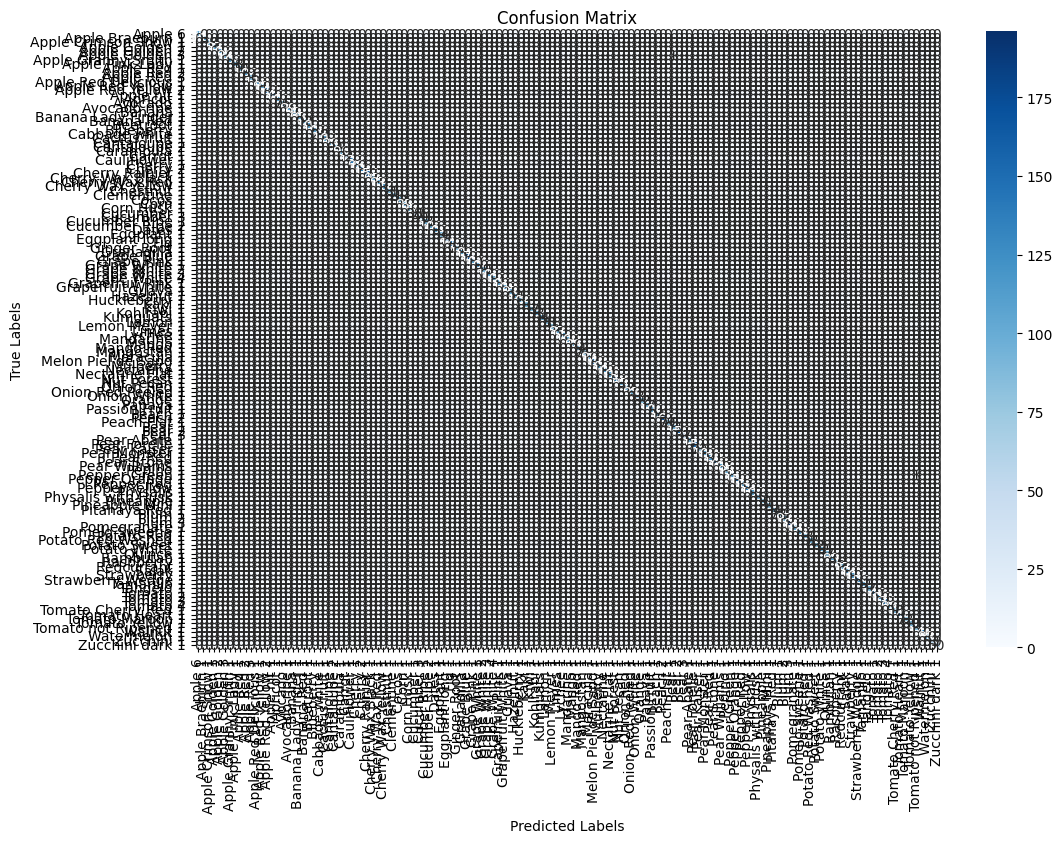

Class: Apple 6
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 96.0
Class: Apple Braeburn 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 118.0
Class: Apple Crimson Snow 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 88.0
Class: Apple Golden 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 97.0
Class: Apple Golden 2
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 106.0
Class: Apple Golden 3
  precision: 1.0
  recall: 0.98989898989899
  f1-score: 0.9949238578680203
  support: 99.0
Class: Apple Granny Smith 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 103.0
Class: Apple Pink Lady 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 88.0
Class: Apple Red 1
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 90.0
Class: Apple Red 2
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 103.0
Class: Apple Red 3
  precision: 1.0
  recall: 1.0
  f1-score: 1.0
  support: 86.0
Class: Apple Red Delicious 1
  p

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

# Realizando previsões no conjunto de validação
y_true = []
y_pred = []

# Iterar sobre o conjunto de validação para coletar as previsões e os rótulos reais
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Rótulos reais
    predictions = model.predict(images)  # Previsões do modelo
    y_pred.extend(np.argmax(predictions, axis=1))  # Indices das previsões com maior probabilidade

# Converter para numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Exibindo o relatório de classificação
print('Classification Report:')
target_names = class_names  # A lista de classes do seu conjunto de dados
print(classification_report(y_true, y_pred, target_names=target_names))

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)

# Exibindo a matriz de confusão usando seaborn para melhorar a visualização
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Certificando-se de que o relatório de classificação é impresso completamente
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

# Mostrando as métricas detalhadas do relatório de classificação
for label, metrics in report.items():
    if label != 'accuracy':
        print(f"Class: {label}")
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")

### Predict Images

In [20]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


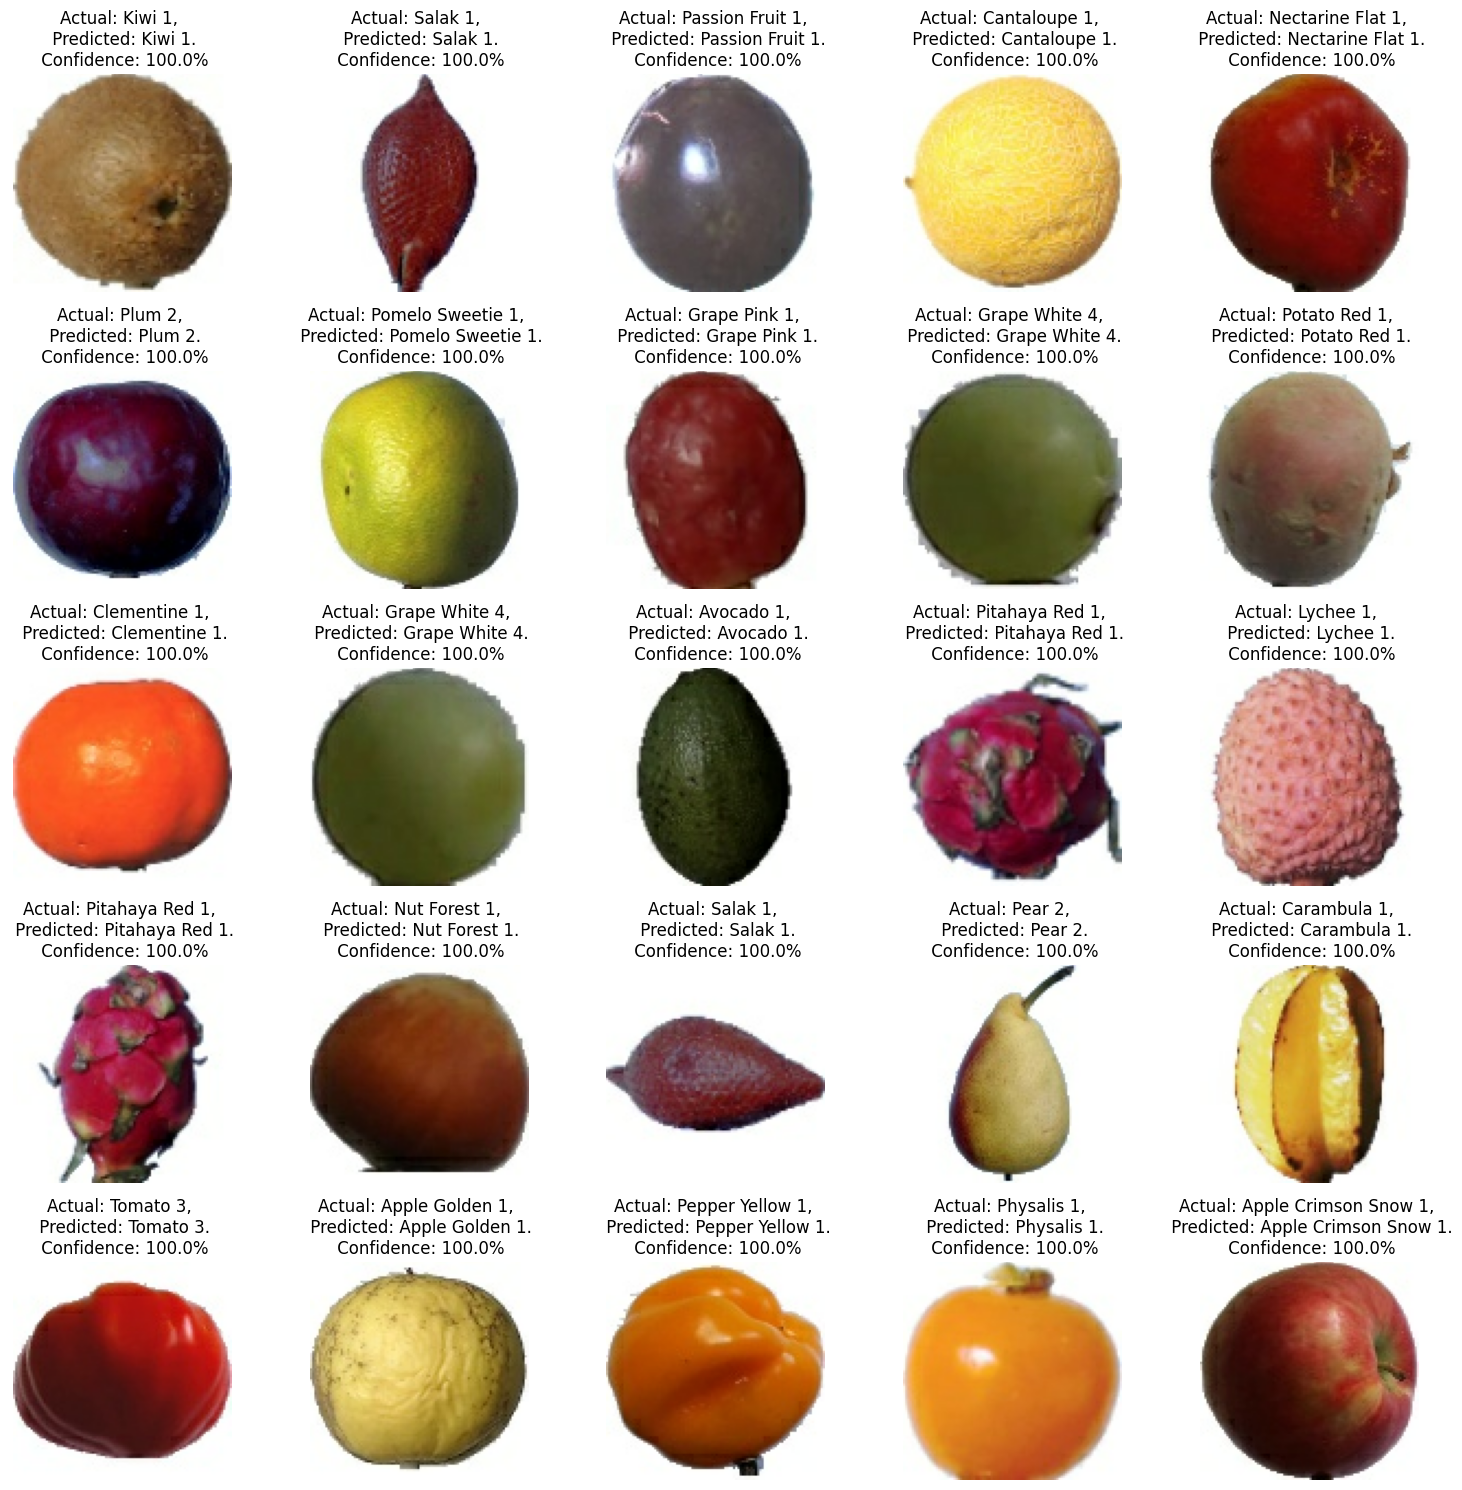

In [21]:
import matplotlib.pyplot as plt

# Assuming val_ds is your validation dataset
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)  # Adjust the subplot layout as per your preference
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107

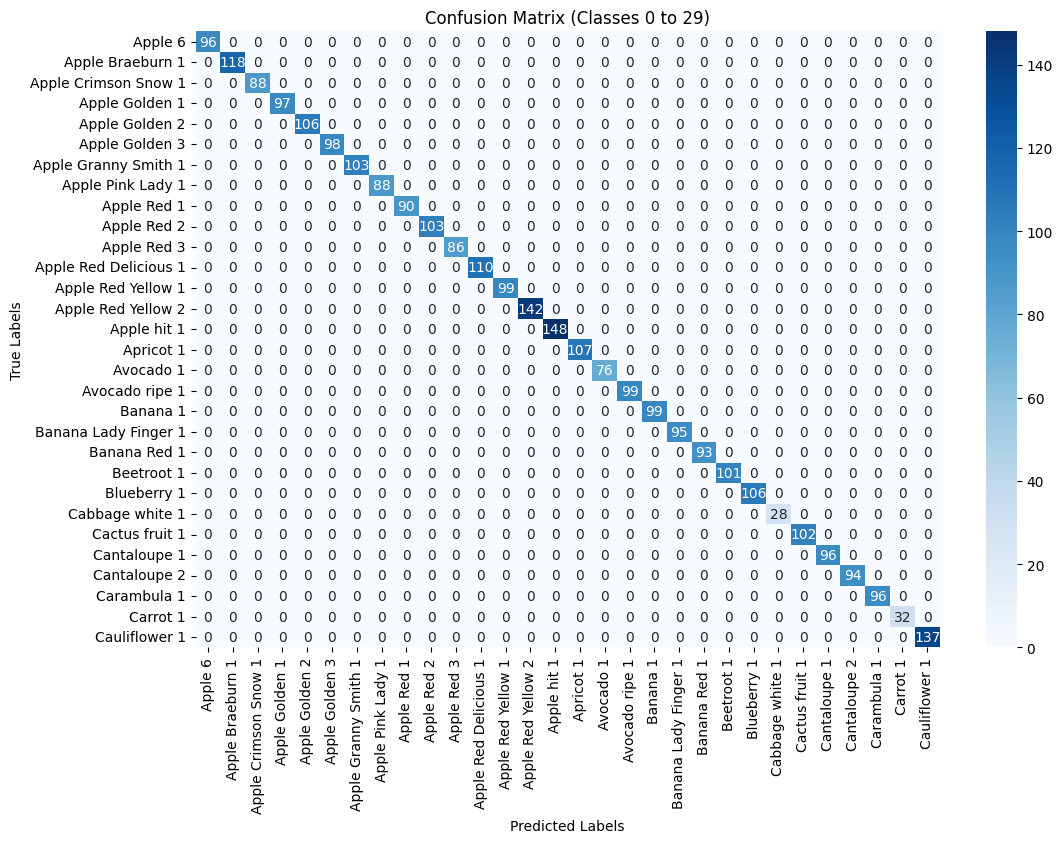

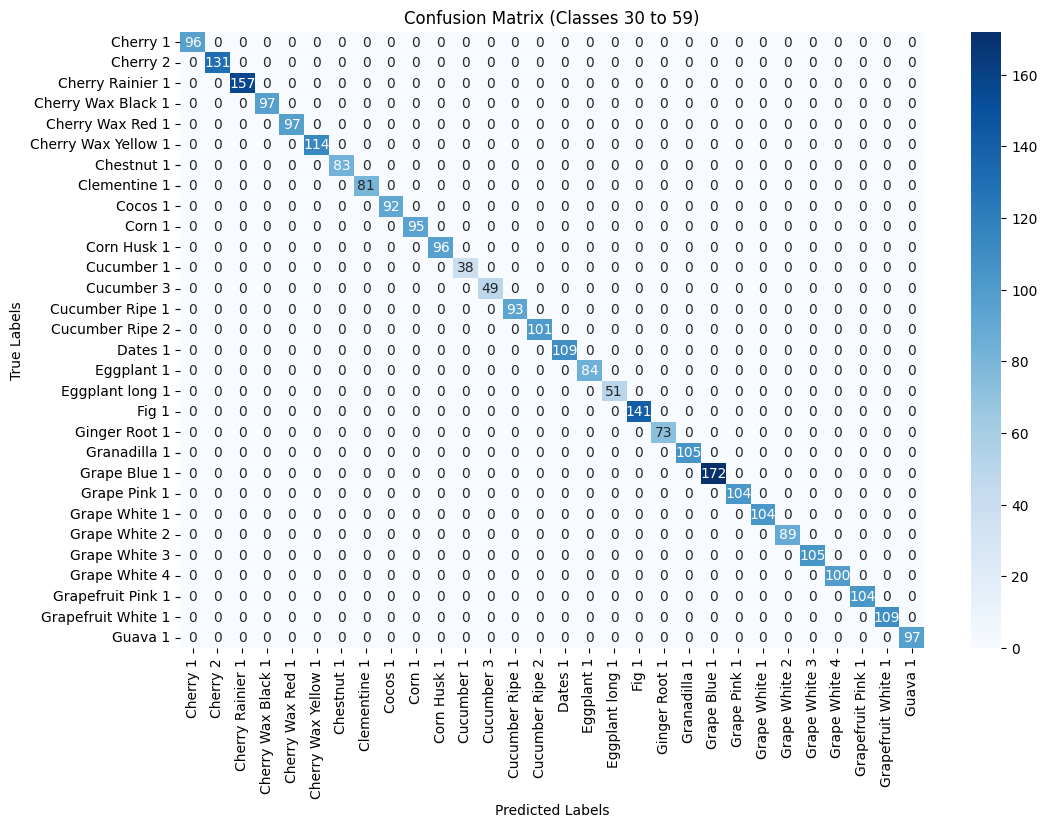

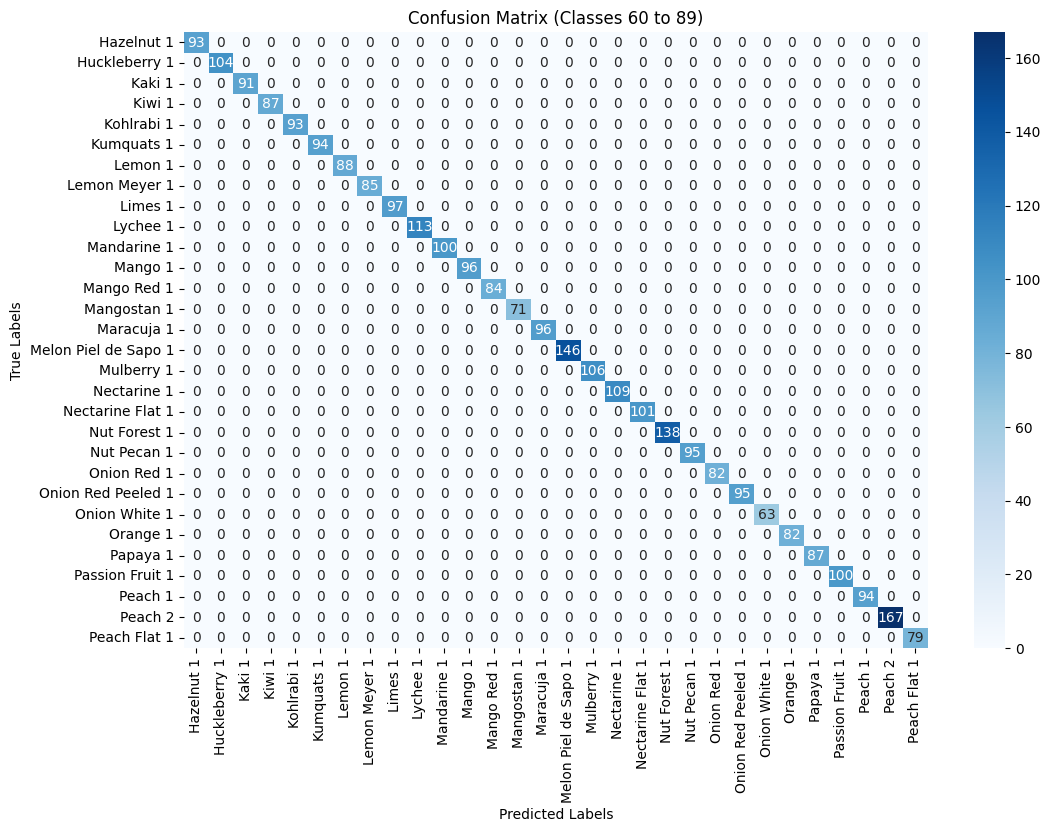

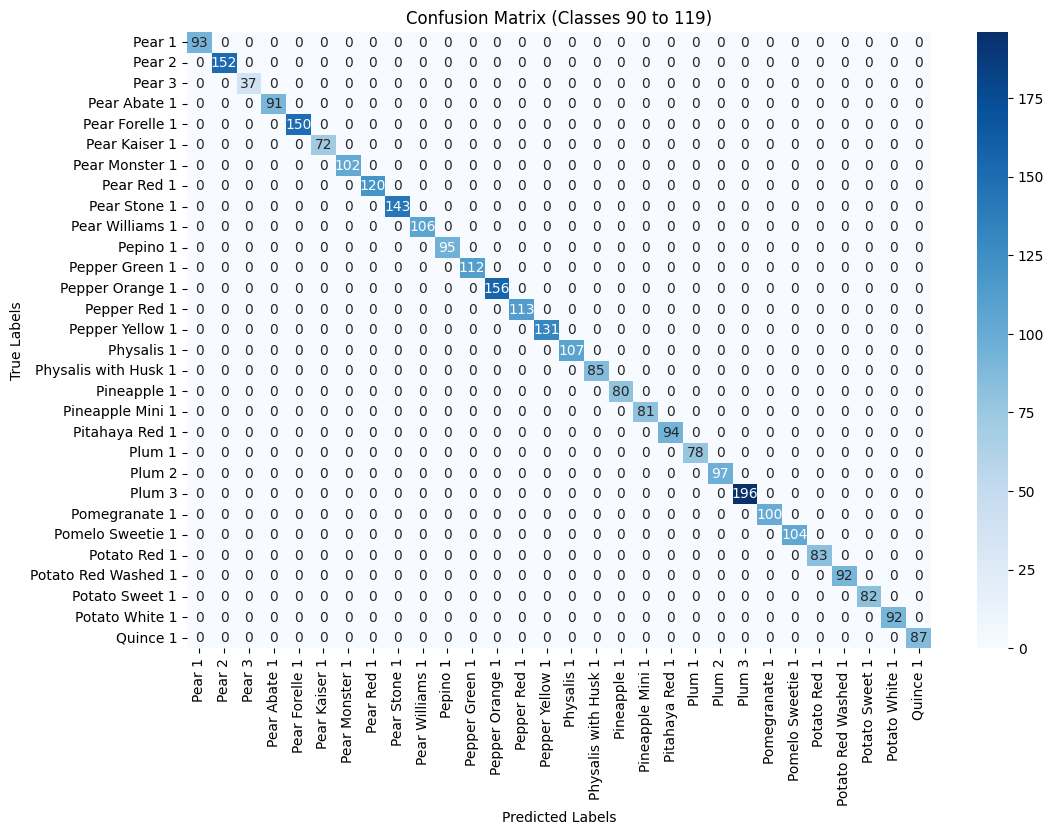

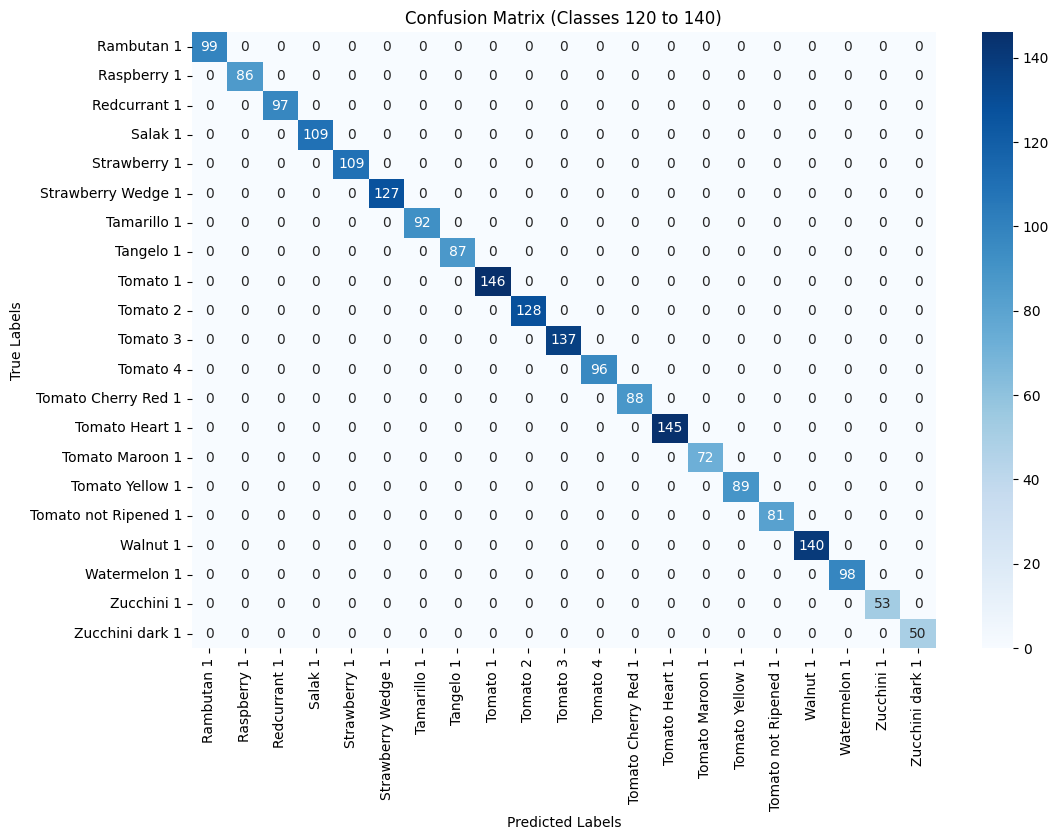


Classification Report (Classes 0 to 29):
Class: Apple 6
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 96.00
Class: Apple Braeburn 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 118.00
Class: Apple Crimson Snow 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 88.00
Class: Apple Golden 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 97.00
Class: Apple Golden 2
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 106.00
Class: Apple Golden 3
  precision: 1.00
  recall: 0.99
  f1-score: 0.99
  support: 99.00
Class: Apple Granny Smith 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 103.00
Class: Apple Pink Lady 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 88.00
Class: Apple Red 1
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 90.00
Class: Apple Red 2
  precision: 1.00
  recall: 1.00
  f1-score: 1.00
  support: 103.00
Class: Apple Red 3
  precision: 1.00
  recall: 1.00
  f1-sco

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Realizando previsões no conjunto de validação
y_true = []
y_pred = []

# Iterar sobre o conjunto de validação para coletar as previsões e os rótulos reais
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Rótulos reais
    predictions = model.predict(images)  # Previsões do modelo
    y_pred.extend(np.argmax(predictions, axis=1))  # Índices das previsões com maior probabilidade

# Converter para numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Exibindo o relatório de classificação
print('Classification Report:')
target_names = class_names  # A lista de classes do seu conjunto de dados
print(classification_report(y_true, y_pred, target_names=target_names))

# Matriz de Confusão completa
cm = confusion_matrix(y_true, y_pred)

# Função para exibir a matriz de confusão em grupos de 30 classes
def plot_confusion_matrix_in_chunks(cm, target_names, chunk_size=30):
    num_classes = len(target_names)
    for i in range(0, num_classes, chunk_size):
        end = min(i + chunk_size, num_classes)
        chunk_cm = cm[i:end, i:end]
        chunk_labels = target_names[i:end]

        plt.figure(figsize=(12, 8))
        sns.heatmap(chunk_cm, annot=True, fmt='g', cmap='Blues', xticklabels=chunk_labels, yticklabels=chunk_labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix (Classes {i} to {end - 1})')
        plt.show()

# Plotando a matriz de confusão em pedaços
plot_confusion_matrix_in_chunks(cm, target_names)

# Relatório de classificação em pedaços
def print_classification_report_in_chunks(report, target_names, chunk_size=30):
    num_classes = len(target_names)
    for i in range(0, num_classes, chunk_size):
        end = min(i + chunk_size, num_classes)
        print(f"\nClassification Report (Classes {i} to {end - 1}):")
        for j in range(i, end):
            class_name = target_names[j]
            metrics = report[class_name]
            print(f"Class: {class_name}")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.2f}")

# Gerando o relatório completo com `output_dict=True`
report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

# Imprimindo o relatório de classificação em pedaços
print_classification_report_in_chunks(report, target_names)


### USANDO O DIRETÓRIO SEPARADO PARA TESTE

In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,              
    batch_size=32,          
    image_size=(100, 100), 
    seed=42                 
)
# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Perda no conjunto de teste: {test_loss:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

Found 23619 files belonging to 141 classes.
739/739 ━━━━━━━━━━━━━━━━━━━━ 54s 73ms/step - accuracy: 0.9641 - loss: 0.1719
Perda no conjunto de teste: 0.1618
Acurácia no conjunto de teste: 96.67%


In [24]:
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())

# Calcular matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão:")
print(confusion_matrix(true_labels, predicted_labels))

print("\nRelatório de classificação:")
print(classification_report(true_labels, predicted_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1

### Testando Frutas Aleatórias


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


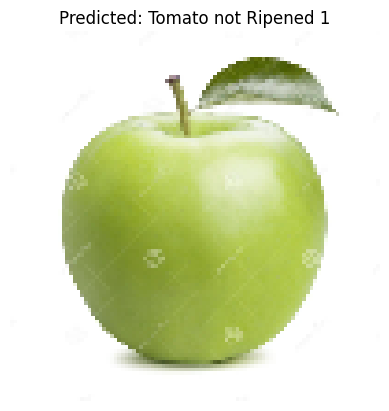

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


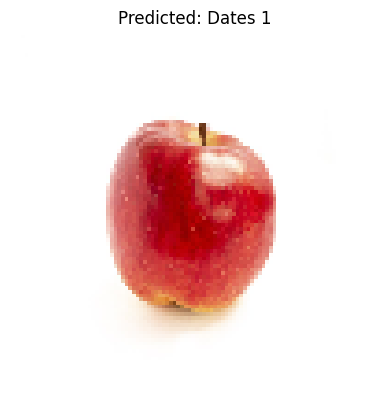

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


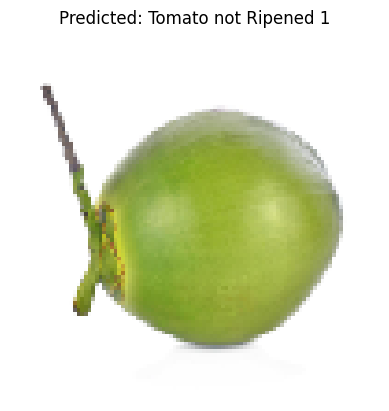

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


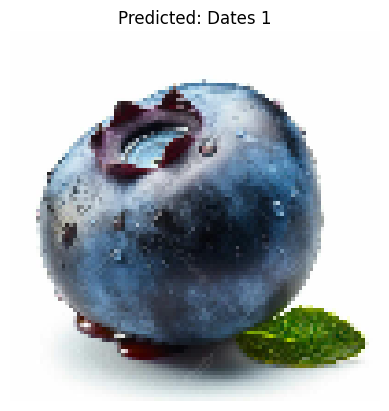

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


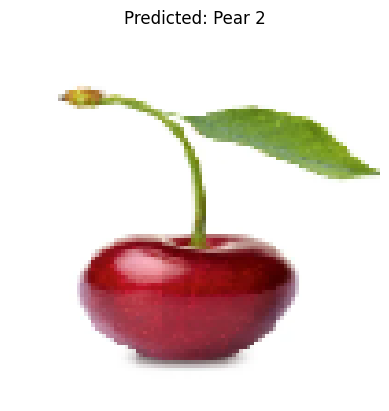

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


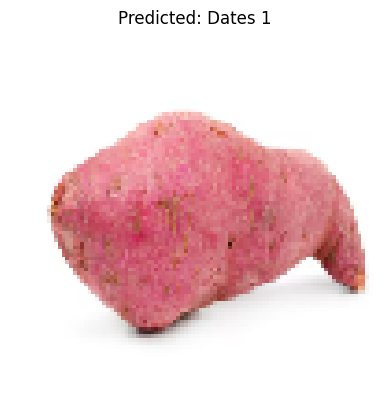

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


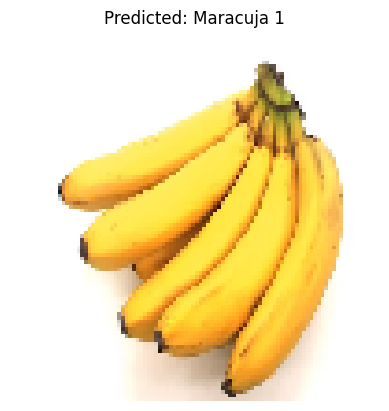

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


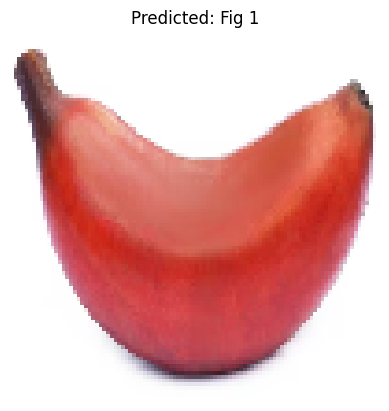

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


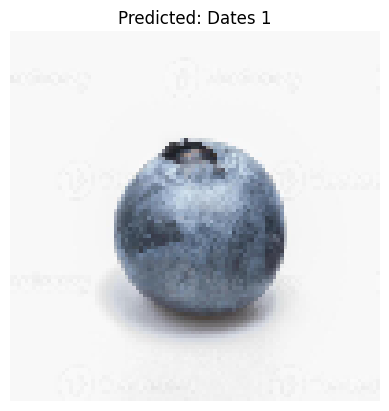

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


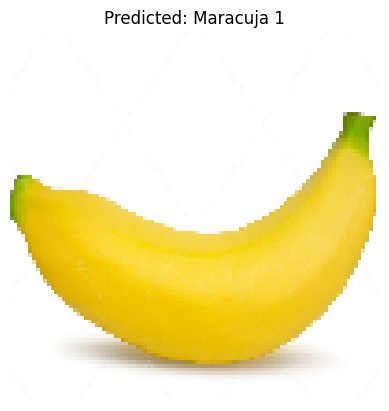

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


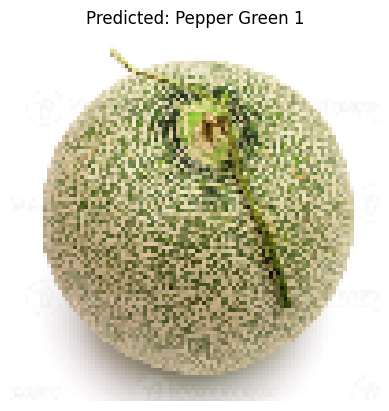

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


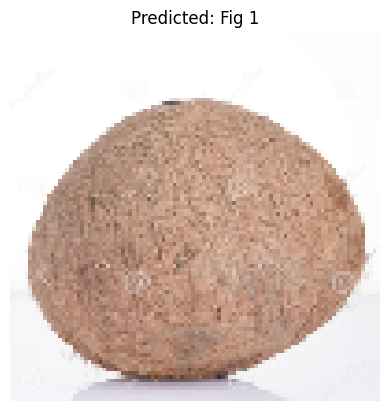

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


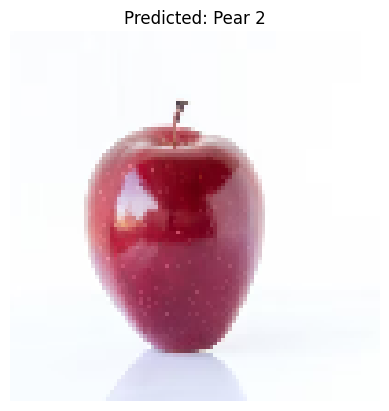

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


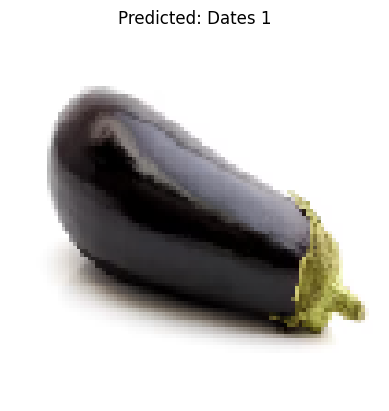

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


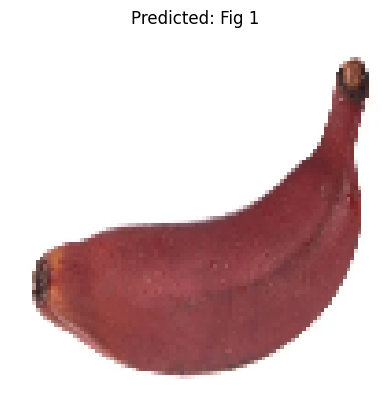

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


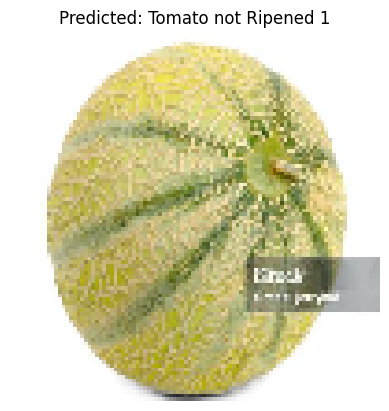

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


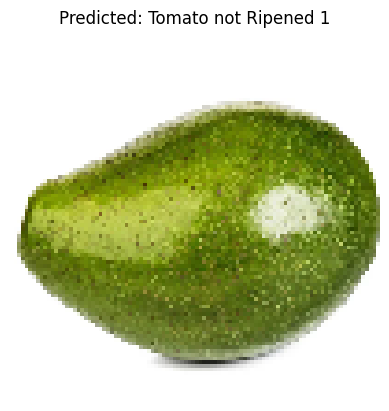

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


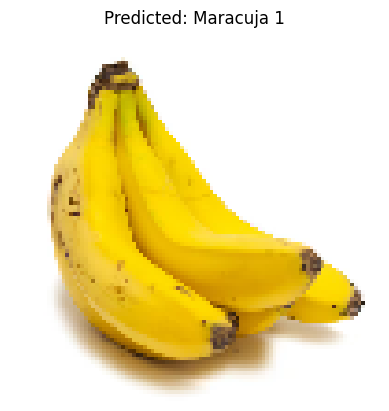

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


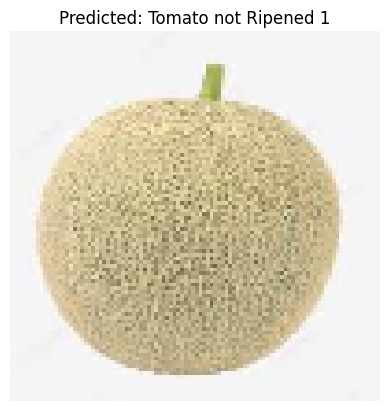

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


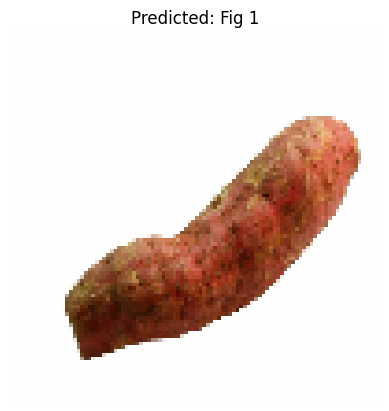

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


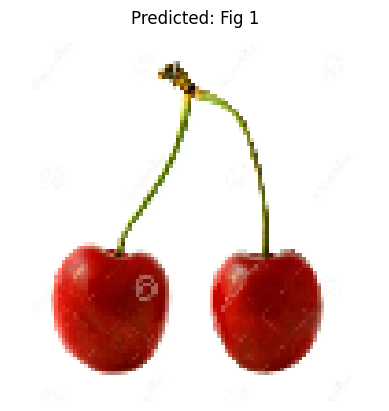

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


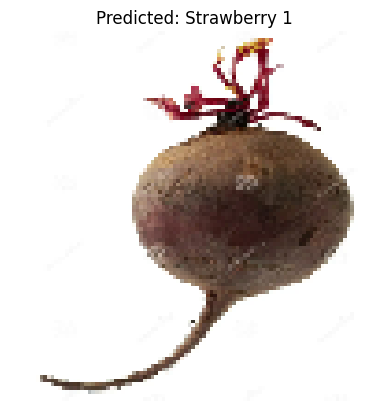

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


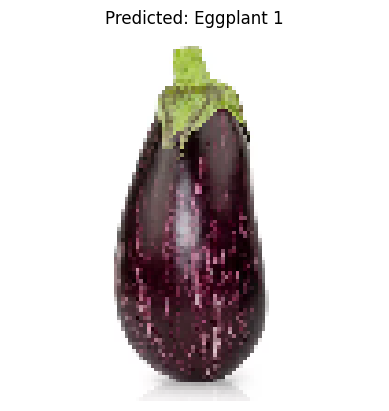

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


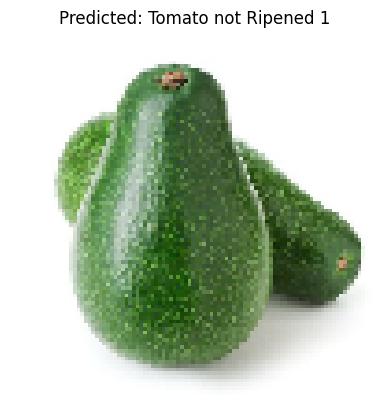

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


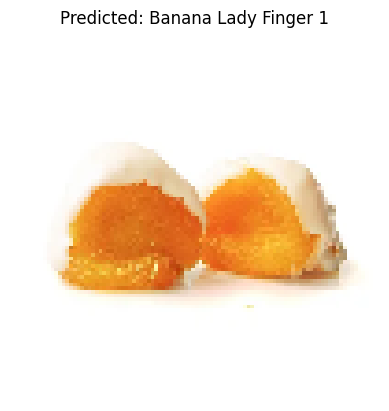

Predictions (class names): ['Tomato not Ripened 1', 'Dates 1', 'Tomato not Ripened 1', 'Dates 1', 'Pear 2', 'Dates 1', 'Maracuja 1', 'Fig 1', 'Dates 1', 'Maracuja 1', 'Pepper Green 1', 'Fig 1', 'Pear 2', 'Dates 1', 'Fig 1', 'Tomato not Ripened 1', 'Tomato not Ripened 1', 'Maracuja 1', 'Tomato not Ripened 1', 'Fig 1', 'Fig 1', 'Strawberry 1', 'Eggplant 1', 'Tomato not Ripened 1', 'Banana Lady Finger 1']
Number of images processed: 25


In [25]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Defina o caminho do diretório com as imagens
image_dir = r"C:/Users/Jrmar\Documents/VS CODE/fruits-360_dataset_100x100/fruits-360/Al"
# Obtenha uma lista de todas as imagens no diretório
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

# Aleatoriamente selecione até 25 imagens
random_images = random.sample(image_files, min(len(image_files), 25))

# Variáveis para armazenar resultados
predictions = []
true_classes = []  # Caso as classes verdadeiras sejam conhecidas

# Usar as classes importadas anteriormente
# Certifique-se de que a variável class_names esteja definida no código principal

# Loop pelas imagens selecionadas
for img_path in random_images:
    # Carregar e pré-processar a imagem
    img = load_img(img_path, target_size=(100, 100))  # Ajuste o tamanho para 100x100
    img_array = img_to_array(img) / 255.0
    img_array = img_array.reshape((1, 100, 100, 3))  # Adiciona dimensão do lote

    # Fazer a predição
    prediction = model.predict(img_array)  # Supondo que 'model' esteja disponível
    predicted_class = prediction.argmax(axis=-1)[0]

    predictions.append(predicted_class)

    # Obter o nome da classe prevista
    class_name = class_names[predicted_class] if predicted_class < len(class_names) else "Unknown"

    # Exibir a imagem e o resultado
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# Estatísticas finais
print("Predictions (class names):", [class_names[pred] if pred < len(class_names) else "Unknown" for pred in predictions])
print("Number of images processed:", len(predictions))